
# Separando e normalizando os dados

In [6]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [7]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

tf.random.set_seed(31)
versao_tensorflow = tf.__version__
print(f'Tensorflow instalado na versão: {versao_tensorflow}')

Tensorflow instalado na versão: 2.16.1


dados de doença cardiaca

In [9]:
%pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
doenca_cardiaca = fetch_ucirepo(id=45)

X = doenca_cardiaca.data.features
X = X[['age', 'chol', 'cp']]

target = doenca_cardiaca.data.targets
target = (target > 0) * 1


Note: you may need to restart the kernel to use updated packages.


In [10]:
X = doenca_cardiaca.data.features
X = X[['age', 'chol', 'cp']]

In [11]:
df_cp = pd.get_dummies(X['cp'], prefix='cp')
X = X.drop('cp', axis=1)
X = X.join(df_cp)

In [12]:
entrada = tf.constant(X, dtype=tf.float32)
y = tf.constant(target, dtype=tf.float32)

Chegou o momento de dividir os dados em treino e teste. Para fazer isso, vamos usar a biblioteca Sklearn. Dentro dela, temos uma função específica para fazer essa divisão. Vamos importar isso na célula seguinte, adicionando from sklearn.model_selection import train_test_split.

Na próxima linha do código, na mesma célula, vamos separar os dados em treino e teste. Vamos criar nosso X de treino, nosso y de treino, nosso X de teste e o Y de teste. Vamos precisar de variáveis para criar isso. Então, vamos colocar X_treino, X_teste, y_treino, y_teste.

Vamos adicionar um sinal de igual e chamar essa função que foi importada acima com um train_test_split(). Entre os parênteses, vamos informar nossa entrada, mas precisamos deixá-la como um .numpy() para que seja entendida corretamente e não fique no formato de tensor.

À sua direita, também vamos passar nosso y, escrevendo y.numpy(). à direita deste, podemos definir alguns parâmetros. Um deles é qual vai ser o tamanho do nosso conjunto de teste. Podemos definir, por exemplo, 20% dos dados separados para teste. Para definir isso, podemos colocar test_size = 0.2.

Adicionaremos uma vírgula e pressionaremos "Enter" para descer uma linha e evitar que a linha de código fique muito longa. Na nova linha, podemos usar uma estratégia que é muito útil, o stratify. Se trata de um parâmetro para o qual vamos passar o y, permitindo que ele mantenha a quantidade de exemplos de 0s e 1s no nosso y, tanto no treino quanto no teste.

Isso impede que haja problemas como ter mais exemplos de pessoas com doença cardíaca em uma coisa, e menos na outra. Isso facilita no processo de classificação. Para adicionar essa estratégia, vamos inserir stratify=y.numpy().

A última coisa que vamos colocar entre os parênteses do train_test_split() é um random state, porque isso é feito de forma aleatória. Para garantir a reprodutibilidade nesse caso, vamos colocar um valor para que você execute em sua máquina e isso aconteça da mesma forma. Então, vamos colocar random_state = e um número aleatório: 4321.

In [13]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(entrada.numpy(), y.numpy(), test_size=0.2,
stratify=y.numpy(), random_state=4321)


Vamos executar esse código, e estará feito. Agora, a ideia é normalizar esses dados, ao invés de normalizar antes de separar em treino e teste, como tínhamos feito antes. Dessa vez, vamos fazer da forma mais adequada.

Já temos o StandardScaler importado na primeira célula. A ideia é começar criando um objeto que vai receber a classe que vai fazer isso. Para isso, na próxima célula, vamos criar um scaler = StandardScaler().

Para evitar o vazamento de dados ao fazer esse processo de normalização, vamos usar somente os dados de treino para fazer o fit e normalizar. Vamos descer uma linha na mesma célula e colocar X_treino = scaler.fit_transform(X_treino). Feito isso, podemos transformar os dados de teste. Desceremos uma linha em relação à anterior e vamos inserir X_teste = scaler.transform(X_teste).

Em seguida, precisamos converter X_treino, X_teste e Y no tipo tensor, como temos o costume de fazer desde o começo. Na próxima linha, vamos fazer converter adicionando X_treino = tf.constant(X_treino, dtype=tf.float32).

Vamos fazer isso para todos. Para o X_teste, vamos descer para a próxima linha e inserir X_teste = tf.constant(X_teste, dtype=tf.float32). Para o y_treino, vamos descer outra linha e inserir y_treino = tf.constant(y_treino, dtype=tf.float32). Por fim, desceremos mais um alinha e adicionaremos o último, y_teste = tf.constant(y_teste, dtype=tf.float32).

In [14]:
scaler = StandardScaler()
X_treino = scaler.fit_transform(X_treino)
X_teste = scaler.transform(X_teste)

X_treino = tf.constant(X_treino, dtype=tf.float32)
X_teste = tf.constant(X_teste, dtype=tf.float32)
y_treino = tf.constant(y_treino, dtype=tf.float32)
y_teste = tf.constant(y_teste, dtype=tf.float32)


Temos tudo preparado e vamos fazer o gradiente funcionar para ver o que acontece.

Adicionando o gradiente
Antes de tudo, precisamos sempre refazer os pesos. Na célula vazia seguinte, vamos fazer o tf.random.set_seed(). Entre os parênteses, vamos dar um valor igual a 31, para manter como fizemos antes.

In [15]:
tf.random.set_seed(31)


Pularemos uma linha e criaremos os pesos e o vies (viés), um em cada linha. O pesos será criado com tf.Variable(), e entre seus parênteses vamos colocar o tf.random.normal(). Entre os parênteses deste, por sua vez, vamos abrir colchetes, entre os quais colocaremos a quantidade_features criada anteriormente.

Vamos adicionar uma vírgula e adicionar o 1 também. À direita dos parênteses de tf.random.normal(), vamos colocar o name que será igual a pesos.

Na linha do vies, ele será igual a tf.Variable(). Entre os parênteses, vamos colocar o mesmo que antes: tf.random.normal(). Entre os parênteses deste, vamos abrir colchetes e colocar o número 1 dentro. à direita de tf.random.normal(), vamos dar o nome inserindo um name = vies.

Na verdade, não temos a quantidade_features ainda. Vamos criar essa variável acima das linhas de pesos e vies, para dar tudo certo. Vamos colocar a quantidade_features, que será igual ao x_treino.shape[] e passar dentro dos colchetes o número 1, para pegar a quantidade de colunas.



In [16]:
quantidade_features = X_treino.shape[1]
pesos = tf.Variable(tf.random.normal([quantidade_features, 1]), name='pesos')
vies = tf.Variable(tf.random.normal([1]), name='vies')


Também precisamos da nossa calculadora de perda. Para adicioná-la, vamos descer mais uma linha e inserir calculadora_perda que será igual ao tf.keras.losses.BinaryCrossentropy().

Além disso, também precisamos do otimizador. Desceremos mais uma linha e adicionaremos um otimizador_treino que será igual ao tf.optimizers.SGD(). Entre seus parênteses, vamos colocar um learning_rate por meio de um learning_rate=0,01.

Na próxima linha, vamos definir a quantidade de épocas, adicionando um QUANTIDADE_EPOCAS será igual a 1.000.

In [17]:
calculadora_perda = tf.keras.losses. BinaryCrossentropy()
otimizador_treino = tf.optimizers.SGD(learning_rate=0.01)
QUANTIDADE_EPOCAS = 1000


Descendo mais duas linhas, vamos armazenar as perdas em uma lista, para ficar mais organizado. Vamos criar uma lista perdas = [], que será vazia.

Desceremos duas linhas e faremos aquele for epoca in range(). Entre parênteses, vamos informar QUANTIDADE_EPOCAS. Já à direita deles, vamos adicionar dois pontos e desceremos para a próxima linha.

Dentro do for, vamos armazenar todas as informações no GradientTape, adicionando um with tf.GradientTape () as tape. No final, adicionaremos dois pontos e desceremos para a próxima linha.

Dentro do with, calcularemos a probabilidade e o custo, adicionando probabilidade que será igual ao tf.sigmoid(). Entre seus parênteses, vamos informar neuronio(), e entre os parênteses deste, o X_treino.

Por enquanto, faltará a função neuronio(), presente em outro notebook. Posteriormente, a copiaremos e adicionaremos neste.

Na próxima linha, vamos colocar o custo também. Ele será igual à calculadora_perda(), e vamos colocar entre estes parênteses o y_treino e a probabilidade que está sendo calculada na linha acima e que serve para comparar as duas coisas e calcular perdas e custos.

Vamos pular uma linha para sair do with e, ainda dentro do for, vamos adicionar os gradientes, que serão iguais ao tape.gradient(). Entre seus parênteses, vamos passar o custo da linha de cima, vírgula, abrir colchetes e passar entre eles os pesos e o vies.

Na linha de baixo, vamos aplicar os gradientes com apply.gradients(). Para isso, vamos chamar o otimizador_treino.apply_gradients(). Entre seus parênteses, vamos passar a função zip(), e entre os parênteses deste, vamos inserir os gradientes, vírgula, e passar entre colchetes os pesos, vírgula, vies.

Após ter feito tudo isso, vamos armazenar as nossas perdas nessa lista. Para isso, pularemos uma linha e, ainda dentro do for, vamos colocar perdas.append() e vamos passar entre seus parênteses o custo.numpy().

Por fim, podemos exibir os resultados a cada 100 épocas. Para isso, vamos pular outra linha e, ainda dentro do for, colocar o if, passando entre parênteses o epoca + 1. À direita, vamos colocar o símbolo de porcentagem, o número 100 == 0. Com isso, vamos imprimir essa época quando o resto da divisão por 100 for zero.

Vamos adicionar dois pontos, acessar a próxima linha e colocar um print(). Entre seus parênteses, vamos colocar uma fstring com f'' e adicionar entre suas aspas Época:, um espaço, um par de chaves e entre elas, a nossa epoca+1. À direita do par de chaves, vamos adicionar uma vírgula e colocar o Custo:, um espaço, e adicionar, entre chaves, o custo.numpy().

Agora, falta a função do neurônio, que pode ser consultada abaixo. Vamos copiá-la e colá-la embaixo da linha vies = tf.Variable(tf.random.normal([1]), name='vies'), na qual definimos os pesos e viés. Nessa função, temos o def_neuronio que recebe o x. Multiplicamos x pelos pesos e adicionamos o viés.

In [18]:
tf.random.set_seed(31)

quantidade_features = X_treino.shape[1]
pesos = tf.Variable(tf.random.normal([quantidade_features, 1]), name='pesos')
vies = tf.Variable(tf.random.normal([1]), name='vies')

def neuronio(x):
    z = tf.add(tf.matmul(x, pesos), vies)
    return z

calculadora_perda = tf.keras.losses. BinaryCrossentropy()
otimizador_treino = tf.optimizers.SGD(learning_rate=0.01)
QUANTIDADE_EPOCAS = 1000

perdas = []

for epoca in range(QUANTIDADE_EPOCAS):
    with tf.GradientTape() as tape:
        probabilidade = tf.sigmoid(neuronio(X_treino))
        custo = calculadora_perda(y_treino, probabilidade)
        
    gradientes = tape.gradient(custo, [pesos, vies])
    otimizador_treino.apply_gradients(zip(gradientes, [pesos, vies]))
    
    perdas.append(custo.numpy())
    
    if (epoca + 1) % 100 == 0:
        print (f'Época: {epoca+1}), Custo: ({custo.numpy()}')


Época: 100), Custo: (1.1161863803863525
Época: 200), Custo: (0.9429414868354797
Época: 300), Custo: (0.8417730927467346
Época: 400), Custo: (0.7737217545509338
Época: 500), Custo: (0.721126139163971
Época: 600), Custo: (0.6769370436668396
Época: 700), Custo: (0.638964831829071
Época: 800), Custo: (0.6073909401893616
Época: 900), Custo: (0.5830886960029602
Época: 1000), Custo: (0.5660953521728516


Vamos rodar para ver se dá certo. Então, está rodando e já está imprimindo o custo a cada época. Começamos com o custo, na época 100, de 1.1 e indo para 0.94, 0.84, 0.77 e vai descendo até chegar a 0.56.

Podemos até plotar um gráfico para ver como fica isso. Para plotar, vamos precisar importar a biblioteca matplotlib. Faremos isso na próxima célula vazia, com o comando abaixo.



Pularemos uma linha e vamos dar um plt.plot() e vamos passar entre parênteses a lista perdas que foi criada mais acima.

Podemos dar um título aos eixos para ficar mais organizado. Para isso, na próxima linha, vamos adicionar plt.title() que terá entre os parênteses o texto "Perda por época" entre aspas simples. Na próxima linha, intitularemos os eixos com plt.xlabel(). O eixo X será a época, portanto, vamos adicionar entre parênteses o texto "Época" entre aspas simples.

Na próxima linha, teremos o eixo y como "Perda", ou seja, plt.ylabel('Perda'). Por fim, desceremos outra linha, na qual vamos adicionar um plt.show() para exibir o gráfico.

É interessante deixar o eixo y começando em zero, para não distorcer o resultado. Entre o ylabel e o show, podemos colocar um plt.ylim() e definir entre parênteses o intervalo de zero até 2 (0,2) para ver como fica.

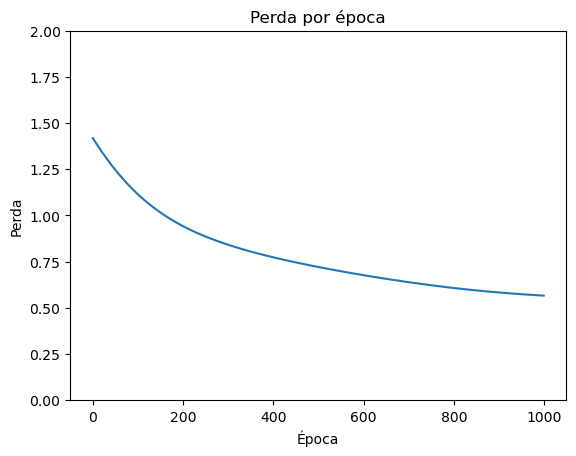

In [19]:
import matplotlib.pyplot as plt
plt.plot(perdas)
plt.title('Perda por época')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.ylim(0,2)
plt.show()


Vamos pensar o seguinte: usamos um learning_rate igual a 0.01. O que aconteceria com o formato que estamos vendo nesse gráfico se testássemos diferentes taxas, tanto mais baixas quanto mais altas? No próximo vídeo vamos testar esses casos.

# agora vamos testar diferentes taxas de aprendizagem (learning_rate) e analisar a diferença
Testamos nosso modelo, observando a perda diminuir a cada época. Vamos testar diferentes taxas de aprendizado e ver como isso afeta a perda por época. Será que haverá uma grande diferença em relação ao que estamos vendo agora? Vamos testar para entender.



In [20]:
def run_all(learning_rate):
    # os pesos e o viés são redefinidos para seus valores iniciais. Isso é crucial para experimentos em aprendizado de máquina, onde você deseja avaliar o impacto de diferentes parâmetros (como a taxa de aprendizagem) sob condições iniciais consistentes.
    global pesos, vies    
    tf.random.set_seed(31)

    quantidade_features = X_treino.shape[1]
    pesos = tf.Variable(tf.random.normal([quantidade_features, 1]), name='pesos')
    vies = tf.Variable(tf.random.normal([1]), name='vies')

    def neuronio(x):
        z = tf.add(tf.matmul(x, pesos), vies)
        return z

    calculadora_perda = tf.keras.losses. BinaryCrossentropy()
    otimizador_treino = tf.optimizers.SGD(learning_rate=learning_rate)
    QUANTIDADE_EPOCAS = 1000

    perdas = []

    for epoca in range(QUANTIDADE_EPOCAS):
        with tf.GradientTape() as tape:
            probabilidade = tf.sigmoid(neuronio(X_treino))
            custo = calculadora_perda(y_treino, probabilidade)
            
        gradientes = tape.gradient(custo, [pesos, vies])
        otimizador_treino.apply_gradients(zip(gradientes, [pesos, vies]))
        
        perdas.append(custo.numpy())
        
        if (epoca + 1) % 100 == 0:
            print (f'Época: {epoca+1}), Custo: ({custo.numpy()}')
    return perdas


In [21]:
learning_rate = 0.0001
perdas_00001 = run_all(learning_rate)

learning_rate = 0.01
perdas_001 = run_all(learning_rate)

learning_rate = 1.0
perdas_1 = run_all(learning_rate)

learning_rate = 10.0
perdas_10 = run_all(learning_rate)


Época: 100), Custo: (1.4142351150512695
Época: 200), Custo: (1.4103833436965942
Época: 300), Custo: (1.4065494537353516
Época: 400), Custo: (1.4027353525161743
Época: 500), Custo: (1.3989380598068237
Época: 600), Custo: (1.3951616287231445
Época: 700), Custo: (1.3914016485214233
Época: 800), Custo: (1.3876588344573975
Época: 900), Custo: (1.3839372396469116
Época: 1000), Custo: (1.380230188369751
Época: 100), Custo: (1.1161863803863525
Época: 200), Custo: (0.9429414868354797
Época: 300), Custo: (0.8417730927467346
Época: 400), Custo: (0.7737217545509338
Época: 500), Custo: (0.721126139163971
Época: 600), Custo: (0.6769370436668396
Época: 700), Custo: (0.638964831829071
Época: 800), Custo: (0.6073909401893616
Época: 900), Custo: (0.5830886960029602
Época: 1000), Custo: (0.5660953521728516
Época: 100), Custo: (0.537421703338623
Época: 200), Custo: (0.537421703338623
Época: 300), Custo: (0.537421703338623
Época: 400), Custo: (0.537421703338623
Época: 500), Custo: (0.537421703338623
Época:

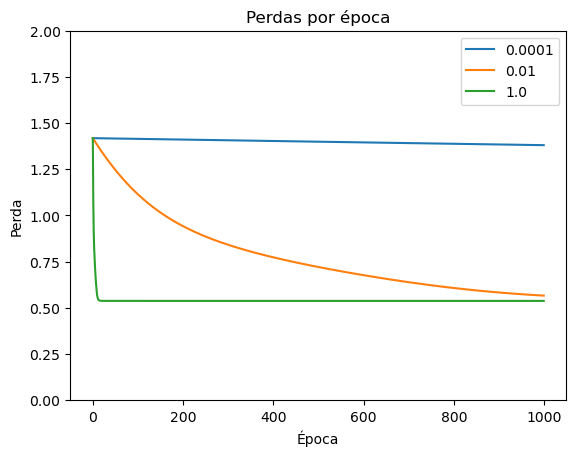

In [26]:
plt.plot(perdas_00001)
plt.plot(perdas_001)
plt.plot(perdas_1)
plt.title('Perdas por época')
plt.legend(['0.0001', '0.01', '1.0'])
plt.xlabel('Época')
plt.ylabel('Perda')
plt.ylim(0,2)
plt.show()


* linja em azul 0.0001, parece até uma reta. Temos um valor de perda que basicamente se estabilizou. Ele não está encontrando o valor mínimo, ou seja, a linha não está conseguindo descer. Como mencionamos quando explicamos sobre gradiente descendente, quando a taxa de aprendizagem é muito baixa, pode ser que não consigamos nos mover para chegar ao ponto mínimo. 

* linha laranja 0.01, Podemos observar a diferença: estamos com o valor mais alto no custo, e então ele vai caindo até chegar no final encontrado na época 1000, o menor valor que ele conseguiu obter.

* verde 1.0 temos um cenário bem diferente. Estávamos com o valor alto em cima do custo, ou seja, do que estava sendo perdido, e de repente ele caiu muito. Na linha da taxa 1, ele deu um passo muito alto e conseguiu encontrar um lugar baixo, um ponto mínimo. Mas em seguida temos uma estabilização. Ele encontrou esse ponto mínimo e ficou ali.

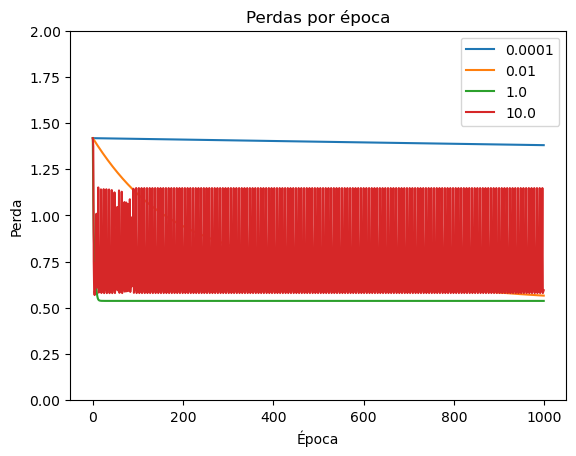

In [28]:
plt.plot(perdas_00001)
plt.plot(perdas_001)
plt.plot(perdas_1)
plt.plot(perdas_10)
plt.title('Perdas por época')
plt.legend(['0.0001', '0.01', '1.0', '10.0'])
plt.xlabel('Época')
plt.ylabel('Perda')
plt.ylim(0,2)
plt.show()


Ao executar, teremos um resultado muito estranho, que está em vermelho. Não dá para ver as outras linhas, pois a linha vermelha as sobrepõe. O resultado ficou caótico, esta linha sobe e desce em intervalos curtos e não conseguimos encontrar o ponto mínimo, a nossa menor perda. Com isso, podemos ver o quão caótico fica quando usamos uma taxa muito alta de aprendizagem.
Entendemos o impacto disso na taxa do gradiente descendente, mas ainda falta fazer uma coisa no nosso modelo. Quando o testamos anteriormente, conseguimos obter o custo com a taxa de aprendizagem de 0.01, mas também podemos calcular outra coisa.

Utilizamos os dados de treino para calcular o custo, mas também podemos calcular a taxa de acerto nos dados de teste. 

# Avaliando a taxa de acerto

Chegou o momento de verificar o quão preciso modelo está nos dados de teste. Em uma nova célula, vamos criar um código onde obteremos uma lista com as perdas e também uma lista com a taxa de acerto. Assim, poderemos comparar no final de cada época tanto o custo quanto o acerto, e verificar se está melhorando ou piorando.

### Verificando a precisão do modelo

Podemos criar essas listas no início do código. Vamos definir perdas como uma lista vazia [] e na próxima linha, taxas_acerto também como uma lista vazia.



In [29]:
perdas = []
taxas_acerto = []


vamos começar redefinindo os pesos, como sempre fazemos. Vamos copiar e colar o conteúdo abaixo obtido no código anterior, para facilitar.

In [30]:
tf.random.set_seed(31)

quantidade_features = X_treino.shape[1]
pesos = tf.Variable(tf.random.normal([quantidade_features, 1]), name='pesos')
vies = tf.Variable(tf.random.normal([1]), name='vies')


Estamos começando definindo o seed igual a 31, e temos os pesos e o viés, usando a quantidade de features.

Entre a linha taxas_acerto e o conteúdo colado, precisamos definir otimizador. Vamos definir otimizador_treino como tf.optimizers.SGD(), e informaremos entre parênteses o learning_rate. Já testamos alguns valores de learning_rate, e o resultado mais interessante foi com 0.01, então vamos usar esse valor.

In [31]:
perdas = []
taxas_acerto = []
otimizador_treino = tf.optimizers.SGD(learning_rate=0.01)


Abaixo do conteúdo que colamos, a ideia será começar obtendo o custo. Vamos adicionar o comentário # Obtendo o custo.

Já fizemos isso várias vezes. Vamos pular uma linha e usar um loop for para cada época no range da QUANTIDADE_EPOCAS, adicionando dois pontos no final. No interior desse for, na linha de baixo, vamos adicionar um with e chamar o tf.GradientTape() as tape, e adicionar dois pontos no final.

No interior do with, vamos calcular a probabilidade. A probabilidade será igual a tf.sigmoid(), informando entre parênteses um neuronio[] e entre os colchetes deste, X_treino, pois estamos calculando custos para o treino.

Na próxima linha, ainda dentro do with, vamos obter o custo, que será igual a calculadora_perda(), informando entre parênteses o y_treino e a probabilidade.

gradientes serão iguais ao tape.gradient(), informando entre parênteses custo e um par de colchetes, entre os quais informaremos pesos e vies. Descendo mais uma linha, vamos aplicar o gradiente usando otimizador_treino.apply_gradients(), usando entre parênteses a função zip().

Entre os parênteses de zip(), vamos informar os gradientes, um par de colchetes e em seu interior, pesos e vies.


In [33]:
# Obtendo o custo

for epoca in range(QUANTIDADE_EPOCAS):
    with tf.GradientTape() as tape:
        probabilidade = tf.sigmoid(neuronio(X_treino))
        custo = calculadora_perda(y_treino, probabilidade)
        
        gradientes = tape.gradient(custo, [pesos, vies])
        otimizador_treino.apply_gradients(zip(gradientes, [pesos, vies]))


Abaixo disso, ainda dentro do with, vamos calcular a taxa de acerto dos dados de teste. Primeiro, vamos adicionar o comentário # Calculando a taxa de acerto nos dados de teste.

Para esse cálculo, vamos iniciar calculando a probabilidade para o teste. Desceremos uma linha e adicionaremos probabilidade_teste, que será igual a tf.sigmoid(), informando entre parênteses neuronio(). Entre os parênteses deste, adicionaremos os dados de teste com X_teste.

Na próxima linha, ao invés de calcular o custo, vamos calcular o acerto. Vamos criar uma variável chamada acertos, que será igual a uma função que já conhecemos antes.

Vamos lembrar que, ao calcular acertos, utilizamos o NumPy, comparamos o y real com o y previsto e obtemos um valor de acurácia. Para isso, adicionaremos um np.mean(), informando entre parênteses um y_teste.numpy() == ((probabilidade_teste.numpy() > 0.5) * 1).

Em seguida, precisamos adicionar esses acertos na lista de taxas de acerto, e também adicionar o custo na lista de perdas. Para as taxas de acerto, na próxima linha, vamos usar taxas_acerto.append(acertos). Em seguida, pularemos uma linha e, para o custo, adicionaremos perdas.append(custo.numpy()).

In [34]:
# Calculando a taxa de acerto nos dados de teste
probabilidade_teste = tf.sigmoid(neuronio(X_teste))
acertos = np.mean(y_teste.numpy() == ((probabilidade_teste.numpy() > 0.5) *1))
taxas_acerto.append(acertos)

perdas.append(custo.numpy())


Por fim, podemos exibir os resultados por época, tanto do custo quanto do acerto. Vamos imprimir se for múltiplo de 100. Para isso, pularemos uma linha, sairemos do with e usaremos um if para verificar se (epoca + 1) % 100 == 0. Em seu interior, se for múltiplo de 100, vamos imprimir a época, o custo e a taxa de acerto com a f-string f'Época: {epoca+1}, Custo: {custo.numpy(), Taxa de acerto: {acertos}'.



In [35]:
perdas = []
taxas_acerto = []
otimizador_treino = tf.optimizers.SGD(learning_rate=0.01)

tf.random.set_seed(31)

quantidade_features = X_treino.shape[1]
pesos = tf.Variable(tf.random.normal([quantidade_features, 1]), name='pesos')
vies = tf.Variable(tf.random.normal([1]), name='vies')

# Obtendo o custo

for epoca in range(QUANTIDADE_EPOCAS):
    with tf.GradientTape() as tape:
        probabilidade = tf.sigmoid(neuronio(X_treino))
        custo = calculadora_perda(y_treino, probabilidade)
        
        gradientes = tape.gradient(custo, [pesos, vies])
        otimizador_treino.apply_gradients(zip(gradientes, [pesos, vies]))
        
        # Calculando a taxa de acerto nos dados de teste
        probabilidade_teste = tf.sigmoid(neuronio(X_teste))
        acertos = np.mean(y_teste.numpy() == ((probabilidade_teste.numpy() > 0.5) *1))
        taxas_acerto.append(acertos)
        
        perdas.append(custo.numpy())
        
    if (epoca + 1) % 100 == 0:
        print(f'Época: {epoca+1}, Custo: {custo.numpy()}, Taxa de acerto: {acertos}')


Época: 100, Custo: 1.1161863803863525, Taxa de acerto: 0.45901639344262296
Época: 200, Custo: 0.9429414868354797, Taxa de acerto: 0.6065573770491803
Época: 300, Custo: 0.8417730927467346, Taxa de acerto: 0.6721311475409836
Época: 400, Custo: 0.7737217545509338, Taxa de acerto: 0.7540983606557377
Época: 500, Custo: 0.721126139163971, Taxa de acerto: 0.7540983606557377
Época: 600, Custo: 0.6769370436668396, Taxa de acerto: 0.7540983606557377
Época: 700, Custo: 0.638964831829071, Taxa de acerto: 0.7540983606557377
Época: 800, Custo: 0.6073909401893616, Taxa de acerto: 0.7540983606557377
Época: 900, Custo: 0.5830886960029602, Taxa de acerto: 0.7540983606557377
Época: 1000, Custo: 0.5660953521728516, Taxa de acerto: 0.7540983606557377


 para cada época temos a impressão do custo e da taxa de acerto. O custo demonstra estar diminuindo, e a taxa de acerto está aumentando, mas chega um ponto no qual temos uma estabilização.

 Podemos imprimir qual foi o menor custo obtido e o maior acerto obtido, para ter uma ideia e, com isso, poder compará-los a outros resultados obtidos. Na próxima célula vazia, vamos adicionar em linhas diferentes um print(f'Menor custo obtido com um perceptron: {min(perdas)}') e print(f'Maior taxa de acerto obtida com um perceptron: {max(taxas_acerto)}').

In [36]:
print(f'Menor custo obtido com um perceptron: {min(perdas)}')
print(f'Maior taxa de acerto obtida com um perceptron: {max(taxas_acerto)}')


Menor custo obtido com um perceptron: 0.5660953521728516
Maior taxa de acerto obtida com um perceptron: 0.7540983606557377


Podemos plotar um gráfico sobrepondo o custo com a taxa de acerto para ver o que acontece. Para isso, na próxima célula, vamos usar plt.plot(perdas) e plt.plot(taxas_acerto), em linhas diferentes.

Na próxima linha, vamos definir o título do gráfico com plt.title() que conterá 'Perdas e taxas de acerto por época'. Desceremos outra linha e adicionaremos uma legenda com o comando plt.legend(["Perda no treino", "Taxa de acerto no teste"]) para sabermos o que o gráfico nos mostrará.

Nas duas linhas seguintes, definiremos o título do eixo x com plt.xlabel() que conterá 'Época' e o título do eixo y com plt.ylabel() que conterá 'Taxa de acerto'. Também podemos ajustar a escala do gráfico para não ter nenhum problema, adicionando plt.ylim(0,2) na próxima linha.

Finalmente, em outra linha, vamos exibir o gráfico com plt.show().

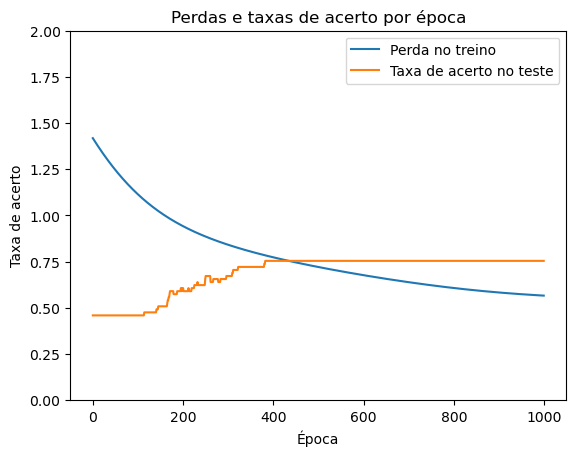

In [37]:
plt.plot(perdas)
plt.plot(taxas_acerto)
plt.title('Perdas e taxas de acerto por época')
plt.legend(['Perda no treino', 'Taxa de acerto no teste'])
plt.xlabel('Época')
plt.ylabel('Taxa de acerto')
plt.ylim(0,2)
plt.show()


Vemos que a perda começa com um valor alto e vai caindo até chegar à última época. É isso que queremos. Já a taxa de acertos estava baixa e vai subindo devagar, formando vários "degraus" de oscilação, até que ultrapassa a linha de perda e depois se estabiliza, a partir da época 400.

Até este momento, estamos trabalhando com um único perceptron, que é um único neurônio. A ideia na próxima aula é adicionar mais neurônios e mais camadas para melhorar o resultado, para que o modelo consiga entender melhor a relação entre nossas entradas e o alvo.
